In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("car sales.csv")

In [3]:
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


In [4]:
df.shape

(23906, 16)

In [5]:
print(df.describe())

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


In [6]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [7]:
# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Convert numerical columns
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors='coerce')
df["Price ($)"] = pd.to_numeric(df["Price ($)"], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

print(df.info())  # Check data types


<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

### Feature Engineering

In [8]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day


In [9]:
df_auto = df[df["Transmission"] == "Auto"]

## Analysis

In [10]:
VehiclesSold=df['Car_id'].count()
VehiclesSold

np.int64(23905)

The number of vehicles sold were: 23906

### Count of sales by gender

In [11]:
### Count of sales by gender
countOfSalesByGender=df['Gender'].value_counts()
countOfSalesByGender

Gender
Male      18797
Female     5108
Name: count, dtype: int64

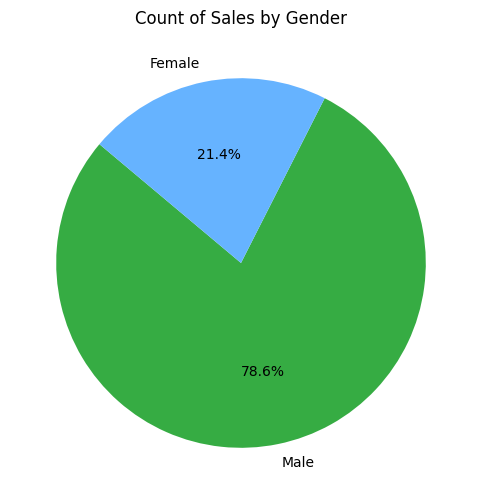

In [12]:
# Visualize as Pie Chart
plt.figure(figsize=(6, 6))
countOfSalesByGender.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#36ac43','#66b3ff'])
plt.title('Count of Sales by Gender')
plt.ylabel('')  # Hide the y-label
plt.show()

### Income by Gender

In [13]:
Incomebygender=df.groupby('Gender')['Annual Income'].mean().round(2)
Incomebygender

Gender
Female    755973.02
Male      851193.15
Name: Annual Income, dtype: float64

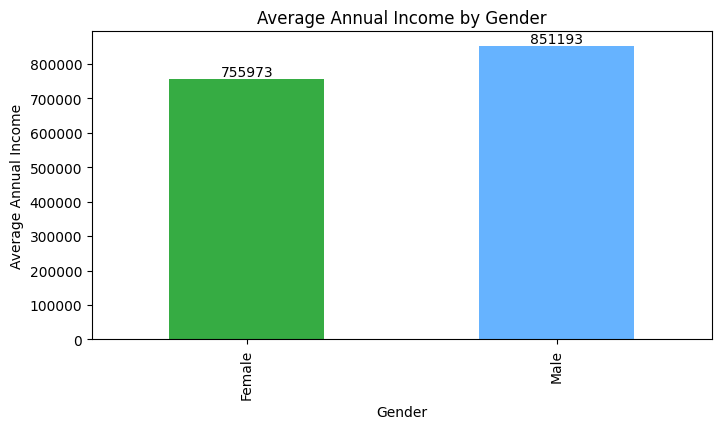

In [14]:
plt.figure(figsize=(8,4))
ax=Incomebygender.plot(kind='bar', color=['#36ac43','#66b3ff'])
plt.title('Average Annual Income by Gender')
plt.ylabel('Average Annual Income')
plt.xlabel('Gender')

# Adding data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

### Amount Spent by Gender 

In [15]:
AmountSpentbygender=df.groupby('Gender')['Price ($)'].sum().round(2)
AmountSpentbygender

Gender
Female    144440271
Male      527040194
Name: Price ($), dtype: int64

## Dealer

### Number of Vehicles sold by each dealer

In [16]:
VehiclesSold=df.groupby('Dealer_Name')['Car_id'].count()
VehiclesSold    

Dealer_Name
Buddy Storbeck's Diesel Service Inc                 627
C & M Motors Inc                                    625
Capitol KIA                                         628
Chrysler Plymouth                                   625
Chrysler of Tri-Cities                              626
Classic Chevy                                       623
Clay Johnson Auto Sales                             627
Diehl Motor CO Inc                                  624
Enterprise Rent A Car                               625
Gartner Buick Hyundai Saab                          628
Hatfield Volkswagen                                 629
Iceberg Rentals                                     627
McKinney Dodge Chrysler Jeep                        629
Motor Vehicle Branch Office                         626
Nebo Chevrolet                                      633
New Castle Ford Lincoln Mercury                     629
Pars Auto Sales                                     630
Pitre Buick-Pontiac-Gmc of Scottsdal

### Amount Earned by Each Dealer

In [17]:
AmountEarned=df.groupby('Dealer_Name')['Price ($)'].sum().round(2)
AmountEarned=AmountEarned.sort_values(ascending=False)
AmountEarned

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Scrivener Performance Engineering                  35258525
Saab-Belle Dodge                                   35220865
Star Enterprises Inc                               35113206
Tri-State Mack Inc                                 35091357
Suburban Ford                                      34943473
Ryder Truck Rental and Leasing                     34837906
Iceberg Rentals                                    17883895
Classic Chevy                                      17819055
Gartner Buick Hyundai Saab                         17739506
Capitol KIA                                        17703134
Enterprise Rent A Car                              17695363
Pars Auto Sales                                    17648228
Nebo Chevrolet              

## Vehicle

### Number of Vehicles Sold by Type

In [18]:
VehicleManufacturers=df.groupby('Company')['Car_id'].count()
VehicleManufacturers=VehicleManufacturers.sort_values(ascending=False)
VehicleManufacturers

Company
Chevrolet     1819
Dodge         1670
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Car_id, dtype: int64

### Most Prefered Vehicle Color 

In [19]:
VehicleColor=df.groupby('Color')['Car_id'].count()
VehicleColor=VehicleColor.sort_values(ascending=False)  
VehicleColor    

Color
Pale White    11255
Black          7857
Red            4793
Name: Car_id, dtype: int64

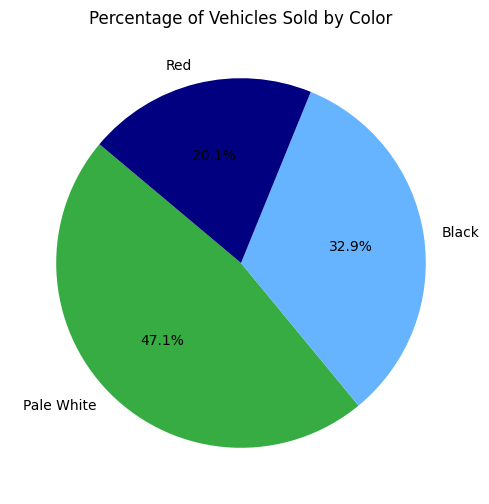

In [20]:
plt.figure(figsize=(6,6))
plt.pie(VehicleColor, labels=VehicleColor.index, autopct='%1.1f%%', startangle=140, colors=['#36ac43','#66b3ff','#000080'])
plt.title('Percentage of Vehicles Sold by Color')  
plt.show() 

### Type of Transmission Sold

In [21]:
TransmissionType=df.groupby('Transmission')['Car_id'].count()
TransmissionType=TransmissionType.sort_values(ascending=False)          
TransmissionType

Transmission
Auto      12570
Manual    11335
Name: Car_id, dtype: int64

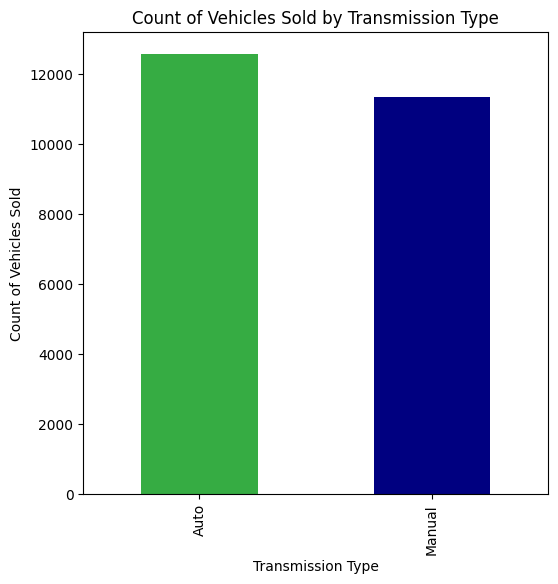

In [22]:
plt.figure(figsize=(6,6))
TransmissionType.plot(kind='bar', color=['#36ac43','#000080'])
plt.title('Count of Vehicles Sold by Transmission Type')        
plt.ylabel('Count of Vehicles Sold')
plt.xlabel('Transmission Type') 
plt.show()

### Preferred Body Style

In [23]:
BodyType=df.groupby('Body Style')['Car_id'].count()
BodyType=BodyType.sort_values(ascending=False)  
BodyType

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: Car_id, dtype: int64

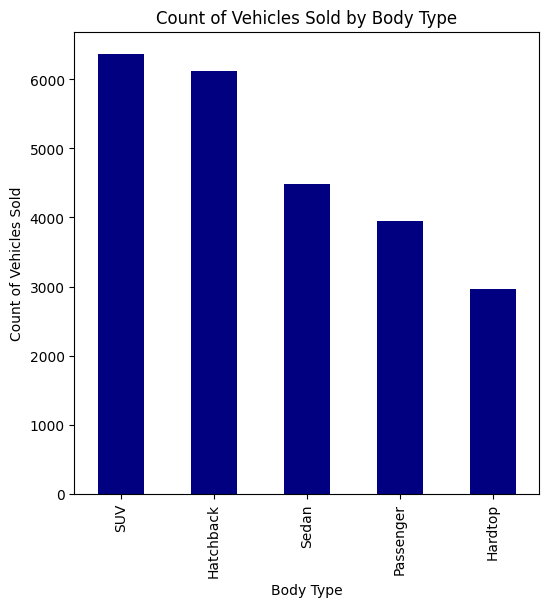

In [24]:
plt.figure(figsize=(6,6))
BodyType.plot(kind='bar', color=['#000080'])  
plt.title('Count of Vehicles Sold by Body Type')
plt.ylabel('Count of Vehicles Sold')
plt.xlabel('Body Type')
plt.show()

## Correlation Analysis

In [25]:
# Correlation matrix between Annual Income and Price
correlation_matrix = df[['Annual Income', 'Price ($)']].corr()

correlation_matrix

,Annual Income,Price ($)
Annual Income,1.000000,0.012075
Price ($),0.012075,1.000000


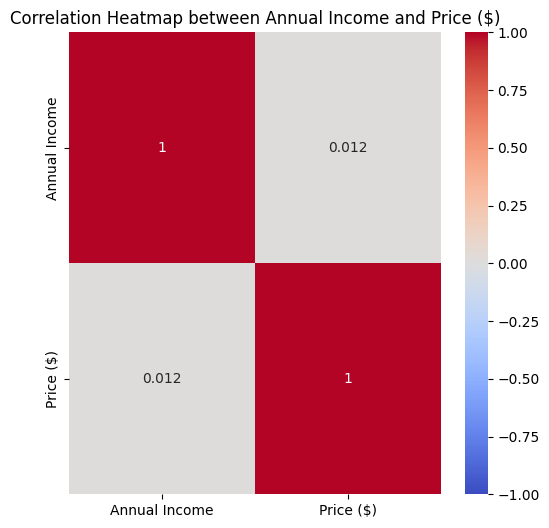

In [26]:
# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Annual Income and Price ($)')
plt.show()

## Predicting Car Prices

### Linear Regression

In [27]:
### importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Encoding Categorical Features
encoder=LabelEncoder()
df['Company']=encoder.fit_transform(df['Company'])
df['Model']=encoder.fit_transform(df['Model'])
df['Transmission']=encoder.fit_transform(df['Transmission'])
df['Dealer_Region']=encoder.fit_transform(df['Dealer_Region'])
df['Gender']=encoder.fit_transform(df['Gender'])
df['Engine']=encoder.fit_transform(df['Engine'])
df['Color']=encoder.fit_transform(df['Color'])

### Features (X) and Target Variable (y)
X=df[['Company','Model','Color','Transmission','Engine']]
y=df['Price ($)']

### Splitting Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  # Predict prices
print("Predicted Prices:", y_pred)


### Model Evaluation
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")

Training set size: (19124, 5)
Testing set size: (4781, 5)
Predicted Prices: [28966.45239231 27522.23119706 27538.9878954  ... 27185.83305377
 29175.59343736 28977.23366985]
Mean Absolute Error (MAE): 11065.878433039283
Mean Squared Error (MSE): 209620815.17516837
R-squared Score (R²): 0.004643014897670161


### DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Define and train the model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # Limit depth to avoid overfitting
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}")
print(f"Decision Tree - MSE: {mse_dt}")
print(f"Decision Tree - RMSE: {rmse_dt}")
print(f"Decision Tree - R²: {r2_dt}")

Decision Tree - MAE: 8740.529563101458
Decision Tree - MSE: 153901310.89232096
Decision Tree - RMSE: 12405.69671128232
Decision Tree - R²: 0.26921978294442095


### Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # 100 trees
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R²: {r2_rf}")

Random Forest - MAE: 4222.608689787617
Random Forest - MSE: 62565890.41586874
Random Forest - RMSE: 7909.8603284678
Random Forest - R²: 0.7029140641279263


### XG BOOST

In [30]:
from xgboost import XGBRegressor

# Define and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MSE: {mse_xgb}")
print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")

XGBoost - MAE: 6017.42333984375
XGBoost - MSE: 78760136.0
XGBoost - RMSE: 8874.690755175641
XGBoost - R²: 0.6260178089141846


Random Forest regressor outperforms other models

### Cross validation 

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean()} (± {scores.std()})")

Cross-validated R²: 0.7031162026447954 (± 0.03559081110471599)


### Hyperparameters for Random Forest Regressor

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],          
    'max_depth': [10, 20, 30, 40, None],                
    'min_samples_split': [2, 5, 10, 20],                
    'min_samples_leaf': [1, 2, 4, 8],                   
    'max_features': ['sqrt', 'log2', 0.33, 0.5],  # Removed 'auto'
    'bootstrap': [True, False]                          
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,               # Number of combinations to try
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # Optimize for R²
    n_jobs=-1,               # Use all CPU cores
    verbose=2,               # Show progress
    random_state=42,
    error_score='raise'  # Raise errors instead of ignoring failed fits
)

# Fit the model
try:
    random_search.fit(X_train, y_train)
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Cross-Validated R²: {random_search.best_score_}")

    # Evaluate on test set with the best model
    best_rf = random_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Optimized Test R²: {r2}")
    print(f"Optimized MAE: {mae}")
    print(f"Optimized RMSE: {rmse}")

except Exception as e:
    print(f"Error occurred: {e}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Cross-Validated R²: 0.7065042894060105
Optimized Test R²: 0.7030915518530803
Optimized MAE: 4215.459533808605
Optimized RMSE: 7907.497185868006


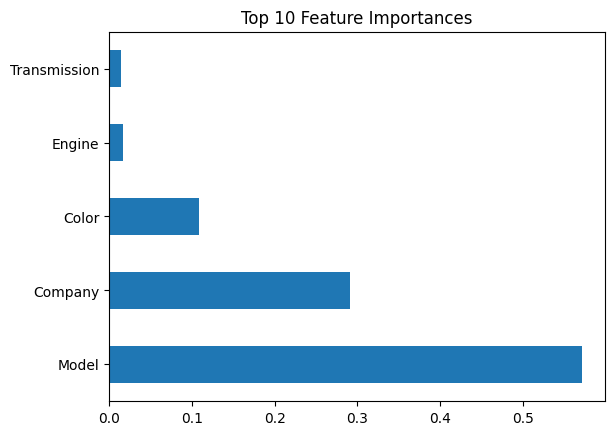

In [33]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset (replace with actual data)

# Encode categorical features
encoder = LabelEncoder()
df['Company'] = encoder.fit_transform(df['Company'])
df['Model'] = encoder.fit_transform(df['Model'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])
df['Color'] = encoder.fit_transform(df['Color'])

# Define input features and target variable
X = df[['Annual Income', 'Company', 'Model', 'Transmission', 'Color']]
y = df['Price ($)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # <--- Train the model here

# Now, you can safely make predictions
encoded_inputs = [[13500, 1, 2, 0, 3]]  # Replace with actual input data
predicted_price = rf_model.predict(encoded_inputs)[0]

print(f"Predicted Price: ${predicted_price}")


Predicted Price: $18633.08792127358


c:\Users\Joy Makena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
import joblib
# Save the trained model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save label encoders
joblib.dump(encoder, "label_encoders.pkl")

['label_encoders.pkl']

In [45]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(rf_model)
    print("Model is already fitted!")
except:
    print("Model is NOT fitted! Training now...")
    rf_model.fit(X_train, y_train)


Model is NOT fitted! Training now...


In [38]:
encoders = {}  # ✅ Store encoders in a dictionary
for col in ["Company", "Model", "Color", "Transmission", "Engine"]:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder  # ✅ Save each encoder
joblib.dump(encoders, "label_encoders.pkl")

['label_encoders.pkl']